# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. ABDUL AZIS AL AYUBBI - 1301213493
2. FATHAN ASKAR - 1301213374
3. DHAFINDRA RAZAQA STEFANO - 1301213115

#### Exploration Data Analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)

In [55]:
data.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [56]:
data.info()
#Tidak ada data null
#data type harus di ubah soalnya beda-beda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [57]:
print("Unique values in the 'family_history_with_overweight' column:", data['family_history_with_overweight'].unique())
print("Unique values in the 'FAVC' column:", data['FAVC'].unique())
print("Unique values in the 'CAEC' column:", data['CAEC'].unique())
print("Unique values in the 'SMOKE' column:", data['SMOKE'].unique())
print("Unique values in the 'SCC' column:", data['SCC'].unique())
print("Unique values in the 'CALC' column:", data['CALC'].unique())
print("Unique values in the 'MTRANS' column:", data['MTRANS'].unique())
print("Unique values in the 'NObeyesdad' column:", data['NObeyesdad'].unique())

Unique values in the 'family_history_with_overweight' column: ['yes' 'no']
Unique values in the 'FAVC' column: ['no' 'yes']
Unique values in the 'CAEC' column: ['Sometimes' 'Frequently' 'Always' 'no']
Unique values in the 'SMOKE' column: ['no' 'yes']
Unique values in the 'SCC' column: ['no' 'yes']
Unique values in the 'CALC' column: ['no' 'Sometimes' 'Frequently' 'Always']
Unique values in the 'MTRANS' column: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Unique values in the 'NObeyesdad' column: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [58]:
row_1292 = data.iloc[1291]  # Note that DataFrame indices are zero-based
print(row_1292)

Gender                                             Male
Age                                           22.720449
Height                                             1.65
Weight                                        89.139209
family_history_with_overweight                      yes
FAVC                                                yes
FCVC                                           2.103335
NCP                                            2.964024
CAEC                                          Sometimes
SMOKE                                                no
CH2O                                                3.0
SCC                                                  no
FAF                                            0.632947
TUE                                                 1.0
CALC                                                 no
MTRANS                            Public_Transportation
NObeyesdad                               Obesity_Type_I
Name: 1291, dtype: object


In [59]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [60]:
'''
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()'''

"\nplt.figure(figsize=(12, 10))\nsns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')\nplt.title('Correlation Heatmap')\nplt.show()"

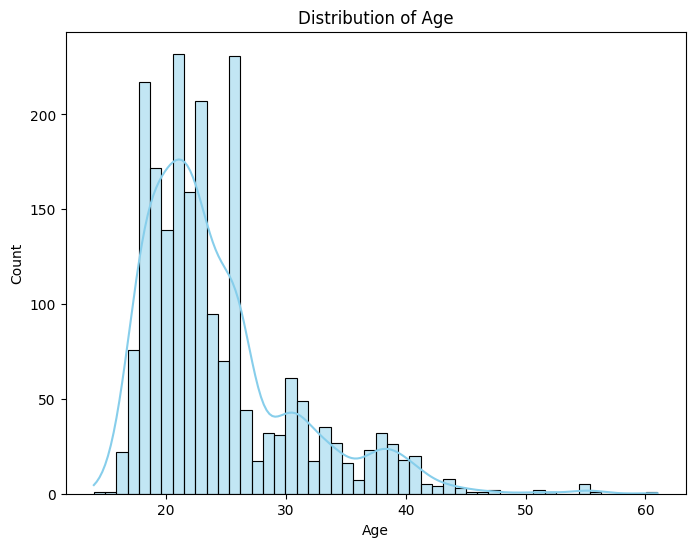

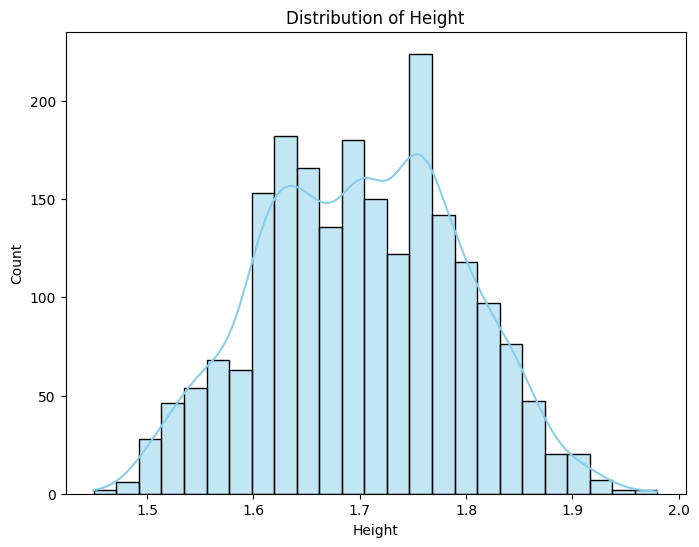

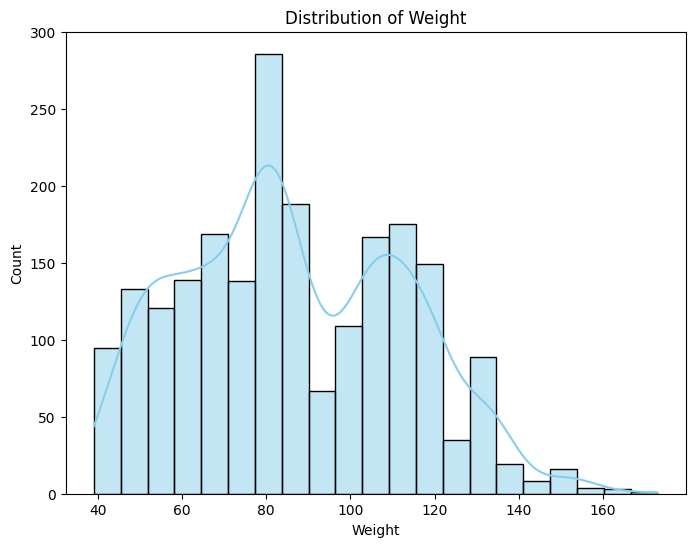

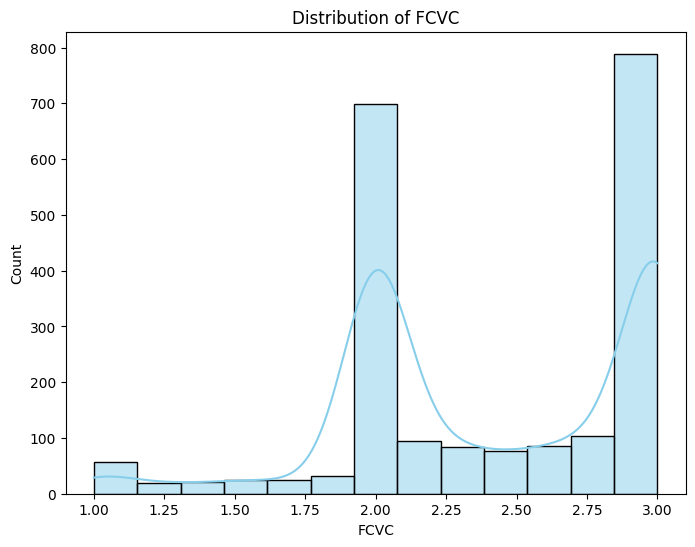

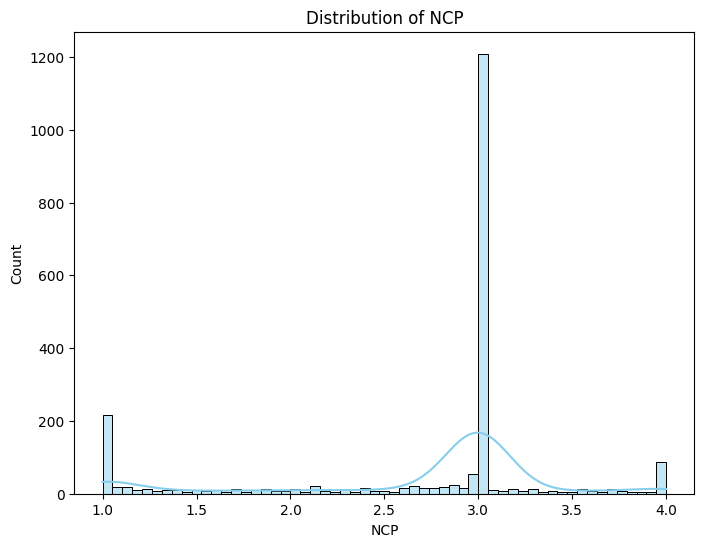

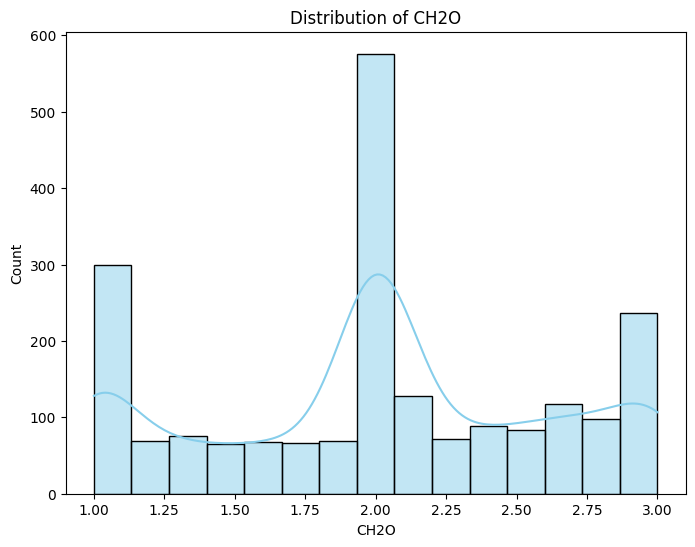

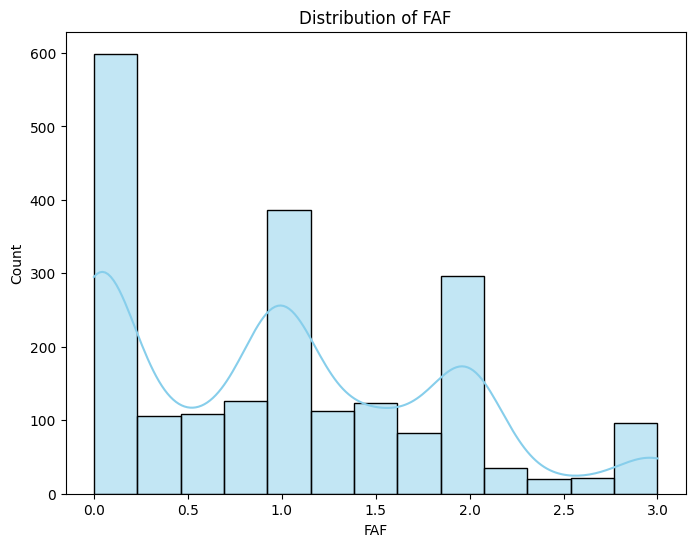

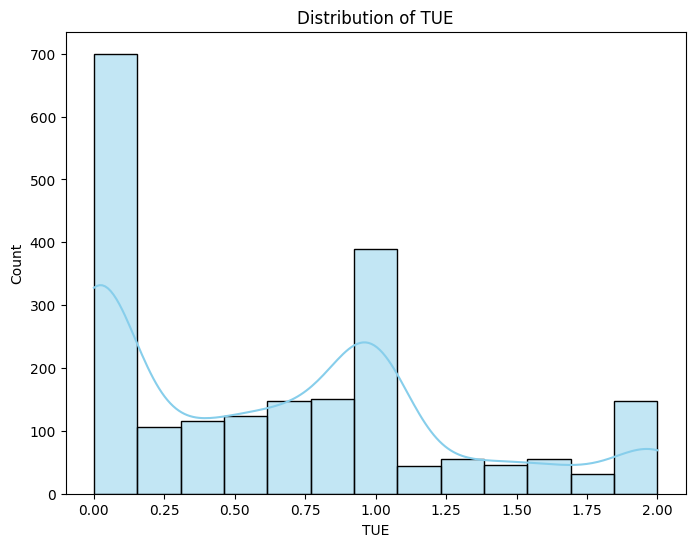

In [61]:
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

####Data Preprocessing

In [62]:
#mengubah data label menjadi data numerik
#ubah ke string karena umur tidak make sense untuk punya koma
data['Age'] = data['Age'].astype(int)

#ganti string 'Female' jadi int 0 dan string 'Male' jadi int 1
replace_mapping_gender = {'Female' : 0, 'Male' : 1}
data['Gender'] = data['Gender'].replace(replace_mapping_gender)

#ganti string 'no' jadi int 0 dan string 'yes' jadi int 1
replace_mapping = {'no' : 0, 'yes' : 1}
data['family_history_with_overweight'] = data['family_history_with_overweight'].replace(replace_mapping)
data['FAVC'] = data['FAVC'].replace(replace_mapping)
data['SMOKE'] = data['SMOKE'].replace(replace_mapping)
data['SCC'] = data['SCC'].replace(replace_mapping)

#ganti 'no' jadi 0, 'sometimes' jadi 1, 'frequent' jadi 2, 'always' jadi 3
mapping = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
data['CAEC'] = data['CAEC'].replace(mapping)
data['CALC'] = data['CALC'].replace(mapping)

#ganti string ke int, transportasi yang paling aktif dikasih nilai rendah,
#transportasi yang paling tidak aktif dikasih nilai tinggi
mtrans_mapping = {'Walking': 0, 'Public_Transportation': 2, 'Automobile': 3, 'Motorbike': 3, 'Bike': 1}
data['MTRANS'] = data['MTRANS'].replace(mtrans_mapping)

#ganti string ke int, yang sehat nilainya rendah, yang paling penyakitan nilainya tinggi
nobeyesdad_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
data['NObeyesdad'] = data['NObeyesdad'].replace(nobeyesdad_mapping)


C:\Users\DHAFINDRA\AppData\Local\Temp\ipykernel_14084\3725180521.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace(replace_mapping_gender)
C:\Users\DHAFINDRA\AppData\Local\Temp\ipykernel_14084\3725180521.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['family_history_with_overweight'] = data['family_history_with_overweight'].replace(replace_mapping)
C:\Users\DHAFINDRA\AppData\Local\Temp\ipykernel_14084\3725180521.py:12: FutureWarning: Downcasting behavior in `replace` is deprecat

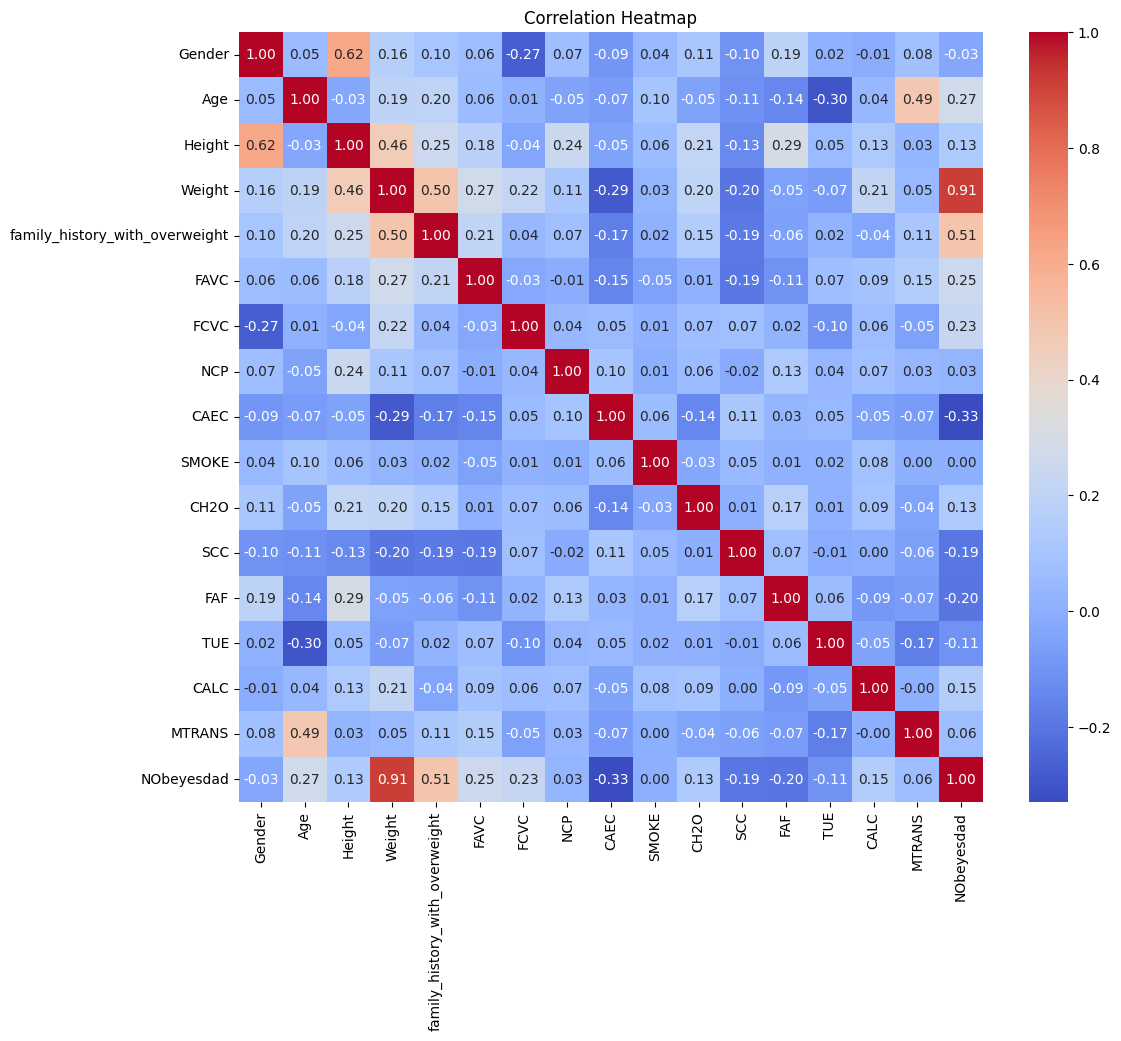

In [63]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

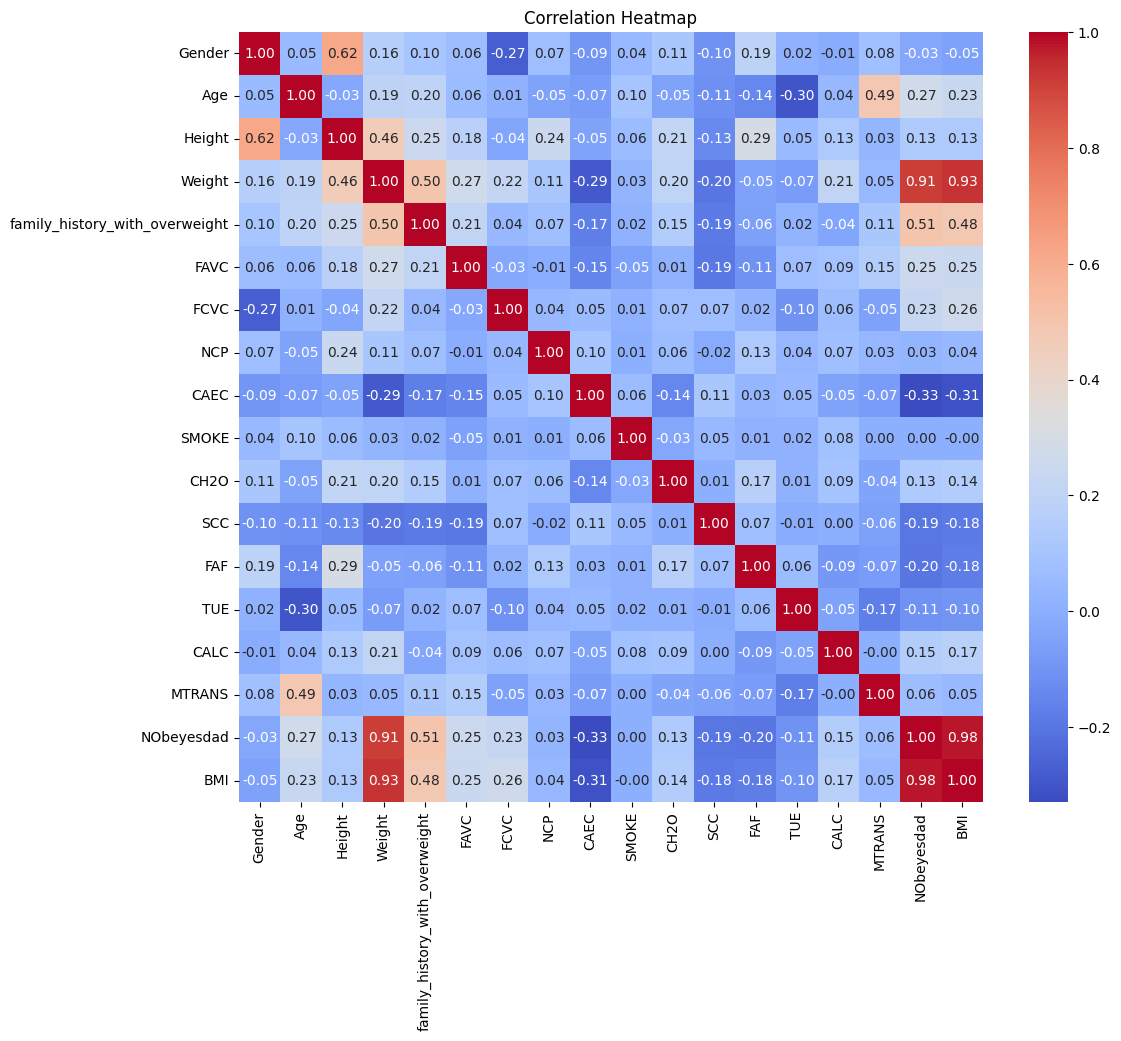

In [64]:
#buat kolom 'BMI' atau 'Body Mass Index'
#BMI = berat (kg) / tinggi^2 (m)

data['BMI'] = data['Weight'] / (data['Height'] ** 2)

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [65]:
# Mengubah data null menjadi mean jika ada
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64


In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [67]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,0,-0.471293,-0.875589,-0.862558,1,0,-0.785019,0.404153,1,0,-0.013073,0,-1.188039,0.561997,0,2,1,-0.663421
1,0,-0.471293,-1.947599,-1.168077,1,0,1.088342,0.404153,1,1,1.618759,1,2.339750,-1.080625,1,2,1,-0.681937
2,1,-0.154194,1.054029,-0.366090,1,0,-0.785019,0.404153,1,0,-0.013073,0,1.163820,0.561997,2,2,1,-0.740967
3,1,0.480005,1.054029,0.015808,0,0,1.088342,0.404153,1,0,-0.013073,0,1.163820,-1.080625,2,0,2,-0.355619
4,1,-0.312743,0.839627,0.122740,0,0,-0.785019,-2.167023,1,0,-0.013073,0,-1.188039,-1.080625,1,2,3,-0.169522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.629843,0.097045,1.711763,1,1,1.088342,0.404153,1,0,-0.456705,0,0.783135,0.407996,1,2,6,1.897925
2107,0,-0.471293,0.502844,1.800914,1,1,1.088342,0.404153,1,0,-0.004702,0,0.389341,-0.096251,1,2,6,1.753152
2108,0,-0.312743,0.541672,1.798868,1,1,1.088342,0.404153,1,0,0.075361,0,0.474971,-0.019018,1,2,6,1.728418
2109,0,0.004356,0.404927,1.785780,1,1,1.088342,0.404153,1,0,1.377801,0,0.151471,-0.117991,1,2,6,1.794305


In [68]:
#untuk mendapatkan top 10 feature (Feature Selection, bisa lebih kecil sih, 5 juga boleh)
correlations_with_target = data.corr()['NObeyesdad'].abs()
top_features = correlations_with_target.sort_values(ascending=False).head(10).index
data_subset = data[top_features]

print(correlations_with_target[top_features])

NObeyesdad                        1.000000
BMI                               0.977826
Weight                            0.913251
family_history_with_overweight    0.505148
CAEC                              0.329350
Age                               0.269966
FAVC                              0.247793
FCVC                              0.227759
FAF                               0.199901
SCC                               0.194508
Name: NObeyesdad, dtype: float64


In [69]:
y = data_subset['NObeyesdad']
X = data_subset.drop(columns=['NObeyesdad'])

#Ringkasan Metode

####Baseline Model

Ada 3 ensemble yang ada, yaitu Bagging, Boosting, dan Stacking. Disini, kami akan mencoba ketiganya untuk memutuskan yang mana yang dijadikan baseline model

In [70]:
# Import library yang diperlukan
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

# Split data menjadi training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#Mencoba Bagging dengan Random Forrest
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy_baseline = accuracy_score(y_test, rf_predictions)
end_time = time.time()
elapsed_time_baseline = end_time - start_time
print(f"Random Forest Accuracy: {rf_accuracy_baseline}")
print(f"Time taken to train and predict: {elapsed_time_baseline} seconds")

#5 fold cross-validation
start_time_cv = time.time()
cross_val_scores_baseline = cross_val_score(rf_model, X_train, y_train, cv=5)
end_time_cv = time.time()
elapsed_time_cv_baseline = end_time_cv - start_time_cv

print("Random Forest Cross-Validation Scores:", cross_val_scores_baseline)
print("Random Forest Mean Cross-Validation Score:", np.mean(cross_val_scores_baseline))
print(f"Time taken for cross-validation: {elapsed_time_cv_baseline} seconds")

Random Forest Accuracy: 0.9858156028368794
Time taken to train and predict: 0.1916954517364502 seconds
Random Forest Cross-Validation Scores: [0.9852071  0.98224852 0.9852071  0.98219585 0.99406528]
Random Forest Mean Cross-Validation Score: 0.985784769897986
Time taken for cross-validation: 0.8568038940429688 seconds


In [72]:
#Mencoba Boosting dengan Gradient Boosting
start_time = time.time()
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
end_time = time.time()
elapsed_time_gb = end_time - start_time

print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(f"Time taken to train and predict: {elapsed_time_gb} seconds")

#Validasi dengan Cross-Validation
start_time_cv = time.time()
cross_val_scores = cross_val_score(gb_model, X_train, y_train, cv=5)
end_time_cv = time.time()
elapsed_time_cv_gb = end_time_cv - start_time_cv

print("Gradient Boosting Cross-Validation Scores:", cross_val_scores)
print("Gradient Boosting Mean Cross-Validation Score:", np.mean(cross_val_scores))
print(f"Time taken for cross-validation: {elapsed_time_cv_gb} seconds")

Gradient Boosting Accuracy: 0.966903073286052
Time taken to train and predict: 1.5848753452301025 seconds
Gradient Boosting Cross-Validation Scores: [0.9704142  0.9704142  0.97337278 0.97329377 0.98813056]
Gradient Boosting Mean Cross-Validation Score: 0.9751251031552333
Time taken for cross-validation: 6.694246768951416 seconds


In [73]:
gb_model

GradientBoostingClassifier(random_state=42)

In [74]:
#Mencoba Stacking
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
start_time = time.time()
base_models = [('dt', DecisionTreeClassifier(max_depth=5)),
              ('svm', SVC(gamma=1.0, C=1.0, probability=True)),
              ('gp', GaussianProcessClassifier(RBF(1.0))),
              ('3nn', KNeighborsClassifier(n_neighbors=3)),
              ('rf',RandomForestClassifier(max_depth=3, n_estimators=25)),
              ('gnb', GaussianNB())]

stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
stacking_predictions = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
end_time = time.time()
elapsed_time_stacking = end_time - start_time
print(f"Stacking Accuracy: {stacking_accuracy}")
print(f"Time taken to train and predict: {elapsed_time_stacking} seconds")

# kelamaan
#Validasi dengan Cross-Validation
start_time_cv = time.time()
cross_val_scores = cross_val_score(stacking_model, X_train, y_train, cv=5)
end_time_cv = time.time()
elapsed_time_cv_model = end_time_cv - start_time_cv

print("Stacking Cross-Validation Scores:", cross_val_scores)
print("Stacking Mean Cross-Validation Score:", np.mean(cross_val_scores))
print(f"Time taken for cross-validation: {elapsed_time_cv_model} seconds")




Stacking Accuracy: 0.983451536643026
Time taken to train and predict: 319.11470675468445 seconds
Stacking Cross-Validation Scores: [0.95857988 0.97337278 0.98224852 0.97329377 0.98813056]
Stacking Mean Cross-Validation Score: 0.9751251031552333
Time taken for cross-validation: 985.5140316486359 seconds


In [75]:
stacking_model

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=5)),
                               ('svm', SVC(gamma=1.0, probability=True)),
                               ('gp',
                                GaussianProcessClassifier(kernel=RBF(length_scale=1))),
                               ('3nn', KNeighborsClassifier(n_neighbors=3)),
                               ('rf',
                                RandomForestClassifier(max_depth=3,
                                                       n_estimators=25)),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

Dari 3 tipe Ensemble yang ada (Bagging, Boosting, dan Stacking) kami pilih Bagging dengan random forrest untuk menjadi baseline model karena itu memiliki akurasi dan validasi(dengan Cross-Validation) paling tinggi dengan 98,58% dan 98,57%. Boosting tidak dipilih karena akurasinya lebih rendah, dan stacking tidak dipilih karena execution time(untuk mendapatkan akurasi maupun validasi) yang sangat lama.  

####Model Exploration

####Model 1

In [76]:
#Model Exploration 1
start_time = time.time()
rf_model1 = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
rf_model1.fit(X_train, y_train)
rf_predictions = rf_model1.predict(X_test)
rf_accuracy_model1 = accuracy_score(y_test, rf_predictions)
end_time = time.time()
elapsed_time_model1 = end_time - start_time
print(f"Random Forest Accuracy: {rf_accuracy_model1}")
print(f"Time taken to train and predict: {elapsed_time_model1} seconds")

#Validasi dengan Cross-Validation
start_time_cv = time.time()
cross_val_scores_model1 = cross_val_score(rf_model1, X_train, y_train, cv=5)
end_time_cv = time.time()
elapsed_time_cv_model1 = end_time_cv - start_time_cv


print("Random Forest Model Exploration 1 Cross-Validation Scores:", cross_val_scores_model1)
print("Random Forest Model Exploration 1 Mean Cross-Validation Score:", np.mean(cross_val_scores_model1))
print(f"Time taken for cross-validation: {elapsed_time_cv_model1} seconds")

Random Forest Accuracy: 0.9881796690307328
Time taken to train and predict: 0.458651065826416 seconds
Random Forest Model Exploration 1 Cross-Validation Scores: [0.9852071  0.98224852 0.9852071  0.98219585 0.99109792]
Random Forest Model Exploration 1 Mean Cross-Validation Score: 0.985191298087897
Time taken for cross-validation: 1.9443624019622803 seconds


Penjelasan exploration, evaluasi dari exploration

####Model 2

In [77]:
#Model Exploration 2
start_time = time.time()
rf_model2 = RandomForestClassifier(n_estimators=5, max_depth=15, random_state=42)
rf_model2.fit(X_train, y_train)
rf_predictions = rf_model2.predict(X_test)
rf_accuracy_model2 = accuracy_score(y_test, rf_predictions)
end_time = time.time()
elapsed_time_model2 = end_time - start_time
print(f"Random Forest Accuracy: {rf_accuracy_model2}")
print(f"Time taken to train and predict: {elapsed_time_model2} seconds")

#Validasi dengan Cross-Validation
start_time_cv = time.time()
cross_val_scores_model2 = cross_val_score(rf_model2, X_train, y_train, cv=5)
end_time_cv = time.time()
elapsed_time_cv_model2 = end_time_cv - start_time_cv

print("Random Forest Model Exploration 2 Cross-Validation Scores:", cross_val_scores_model2)
print("Random Forest Model Exploration 2 Mean Cross-Validation Score:", np.mean(cross_val_scores_model2))
print(f"Time taken for cross-validation: {elapsed_time_cv_model2} seconds")

Random Forest Accuracy: 0.9787234042553191
Time taken to train and predict: 0.019182443618774414 seconds
Random Forest Model Exploration 2 Cross-Validation Scores: [0.97337278 0.9556213  0.96153846 0.97032641 0.97626113]
Random Forest Model Exploration 2 Mean Cross-Validation Score: 0.9674240162941373
Time taken for cross-validation: 0.08320927619934082 seconds


Penjelasan exploration, evaluasi dari exploration

####Model 3

In [78]:
#Model Exploration 3
start_time = time.time()
rf_model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model3.fit(X_train, y_train)
rf_predictions = rf_model3.predict(X_test)
rf_accuracy_model3 = accuracy_score(y_test, rf_predictions)
end_time = time.time()
elapsed_time_model3 = end_time - start_time
print(f"Random Forest Accuracy: {rf_accuracy_model3}")
print(f"Time taken to train and predict: {elapsed_time_model3} seconds")

#Validasi dengan Cross-Validation
start_time_cv = time.time()
cross_val_scores_model3 = cross_val_score(rf_model3, X_train, y_train, cv=5)
end_time_cv = time.time()
elapsed_time_cv_model3 = end_time_cv - start_time_cv

print("Random Forest Model Exploration 3 Cross-Validation Scores:", cross_val_scores_model3)
print("Random Forest Model Exploration 3 Mean Cross-Validation Score:", np.mean(cross_val_scores_model3))
print(f"Time taken for cross-validation: {elapsed_time_cv_model3} seconds")

Random Forest Accuracy: 0.9739952718676123
Time taken to train and predict: 0.20936274528503418 seconds
Random Forest Model Exploration 3 Cross-Validation Scores: [0.96449704 0.9704142  0.97633136 0.97626113 0.9851632 ]
Random Forest Model Exploration 3 Mean Cross-Validation Score: 0.9745333871789018
Time taken for cross-validation: 0.8323957920074463 seconds


Penjelasan exploration, evaluasi dari exploration

####Evaluation

Berikut adalah nilai akurasi, validasi, waktu membuat model dan juga waktu memvalidasi dari semua model, dari baseline hingga ketiga model exploration

In [79]:
#Evaluasi hasil baseline model
print(f"Baseline model Random Forest Accuracy: {rf_accuracy_baseline}")
print(f"Time taken to train and predict Baseline Model: {elapsed_time_baseline} seconds")
print("Random Forest Baseline Model Cross-Validation Scores:", cross_val_scores_baseline)
print("Random Forest Baseline Model Mean Cross-Validation Score:", np.mean(cross_val_scores_baseline))
print(f"Time taken for cross-validate Baseline Model: {elapsed_time_cv_baseline} seconds\n")

#Evaluasi hasil model 1
print(f"Model Exploration 1 Random Forest Accuracy: {rf_accuracy_model1}")
print(f"Time taken to train and predict Model Exploration 1: {elapsed_time_model1} seconds")
print("Random Forest Model Exploration 1 Cross-Validation Scores:", cross_val_scores_model1)
print("Random Forest Model Exploration 1 Mean Cross-Validation Score:", np.mean(cross_val_scores_model1))
print(f"Time taken for cross-validate Model Exploration 1: {elapsed_time_cv_model1} seconds\n")

#Evaluasi hasil model 2
print(f"Model Exploration 2 Random Forest Accuracy: {rf_accuracy_model2}")
print(f"Time taken to train and predict Model Exploration 2: {elapsed_time_model2} seconds")
print("Random Forest Model Exploration 2 Cross-Validation Scores:", cross_val_scores_model2)
print("Random Forest Model Exploration 2 Mean Cross-Validation Score:", np.mean(cross_val_scores_model2))
print(f"Time taken for cross-validate Model Exploration 2: {elapsed_time_cv_model2} seconds\n")

#Evaluasi hasil model 3
print(f"Model Exploration 3 Random Forest Accuracy: {rf_accuracy_model3}")
print(f"Time taken to train and predict Model Exploration 3: {elapsed_time_model3} seconds")
print("Random Forest Model Exploration 3 Cross-Validation Scores:", cross_val_scores_model3)
print("Random Forest Model Exploration 3 Mean Cross-Validation Score:", np.mean(cross_val_scores_model3))
print(f"Time taken for cross-validate Model Exploration 3: {elapsed_time_cv_model3} seconds\n")

Baseline model Random Forest Accuracy: 0.9858156028368794
Time taken to train and predict Baseline Model: 0.1916954517364502 seconds
Random Forest Baseline Model Cross-Validation Scores: [0.9852071  0.98224852 0.9852071  0.98219585 0.99406528]
Random Forest Baseline Model Mean Cross-Validation Score: 0.985784769897986
Time taken for cross-validate Baseline Model: 0.8568038940429688 seconds

Model Exploration 1 Random Forest Accuracy: 0.9881796690307328
Time taken to train and predict Model Exploration 1: 0.458651065826416 seconds
Random Forest Model Exploration 1 Cross-Validation Scores: [0.9852071  0.98224852 0.9852071  0.98219585 0.99109792]
Random Forest Model Exploration 1 Mean Cross-Validation Score: 0.985191298087897
Time taken for cross-validate Model Exploration 1: 1.9443624019622803 seconds

Model Exploration 2 Random Forest Accuracy: 0.9787234042553191
Time taken to train and predict Model Exploration 2: 0.019182443618774414 seconds
Random Forest Model Exploration 2 Cross-Val

#Hasil dan Analisis

[0.9858156  0.98817967 0.9787234  0.97399527]
0.014184397163120588


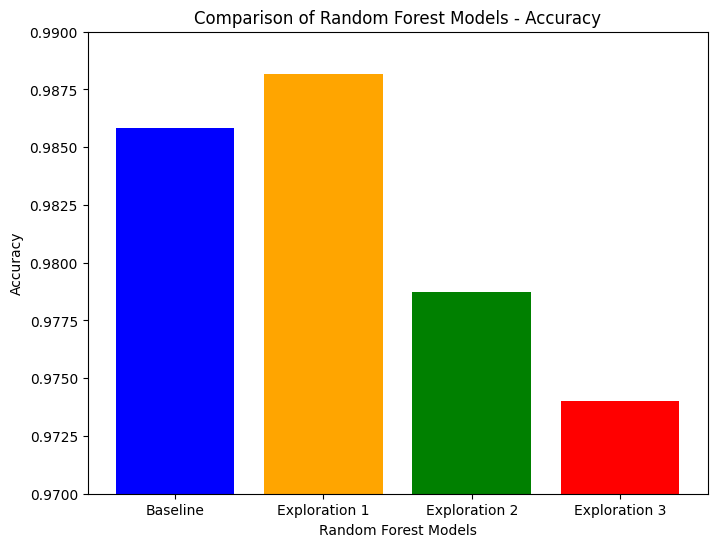

In [80]:
models = ['Baseline', 'Exploration 1', 'Exploration 2', 'Exploration 3']

#graph untuk membandingkan nilai akurasi
accuracy_values = np.array([rf_accuracy_baseline, rf_accuracy_model1, rf_accuracy_model2, rf_accuracy_model3])
print(accuracy_values)
print(accuracy_values[1] - accuracy_values[3])

# Plotting the bar chart for accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0.97, 0.99)  # Set y-axis limits for better visualization

# Adding labels and title
plt.xlabel('Random Forest Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Random Forest Models - Accuracy')

# Display the plot
plt.show()

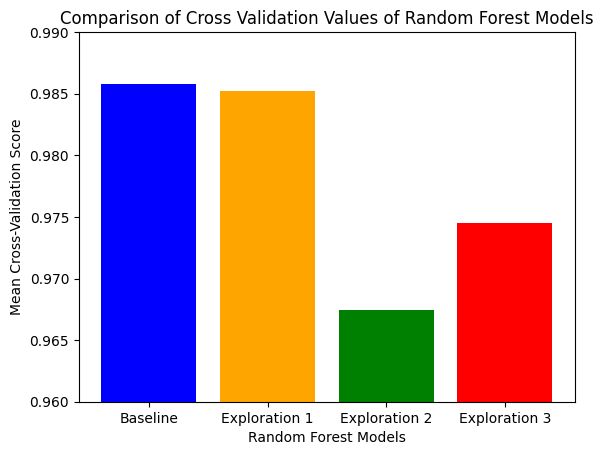

In [81]:
#graph untuk membandingkan nilai cross-validation
cv_mean_baseline = np.mean(cross_val_scores_baseline)
cv_mean_model1 = np.mean(cross_val_scores_model1)
cv_mean_model2 = np.mean(cross_val_scores_model2)
cv_mean_model3 = np.mean(cross_val_scores_model3)
validation_scores = np.array([cv_mean_baseline, cv_mean_model1, cv_mean_model2, cv_mean_model3])

# Plotting the bar chart
plt.bar(models, validation_scores, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0.96, 0.99)  # Set y-axis limits for better visualization

# Adding labels and title
plt.xlabel('Random Forest Models')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Comparison of Cross Validation Values of Random Forest Models')

# Display the plot
plt.show()

[0.19169545 0.45865107 0.01918244 0.20936275]
0.24928832054138184


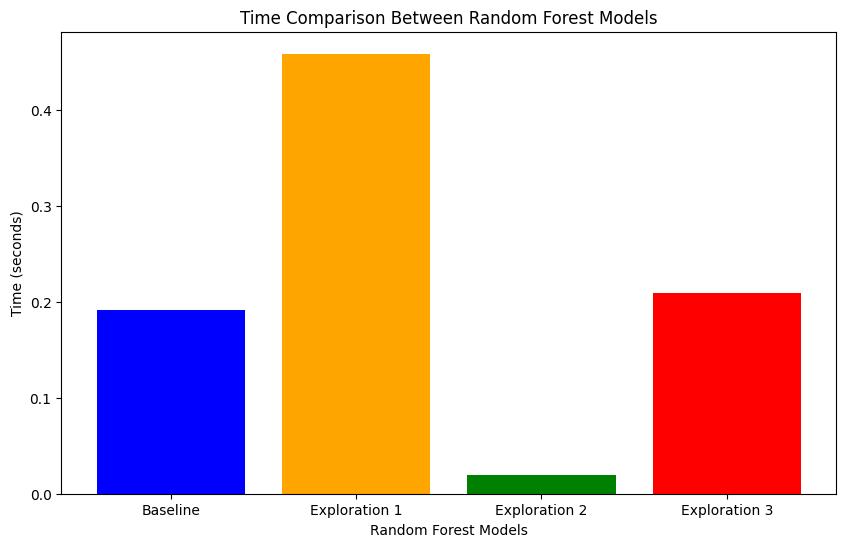

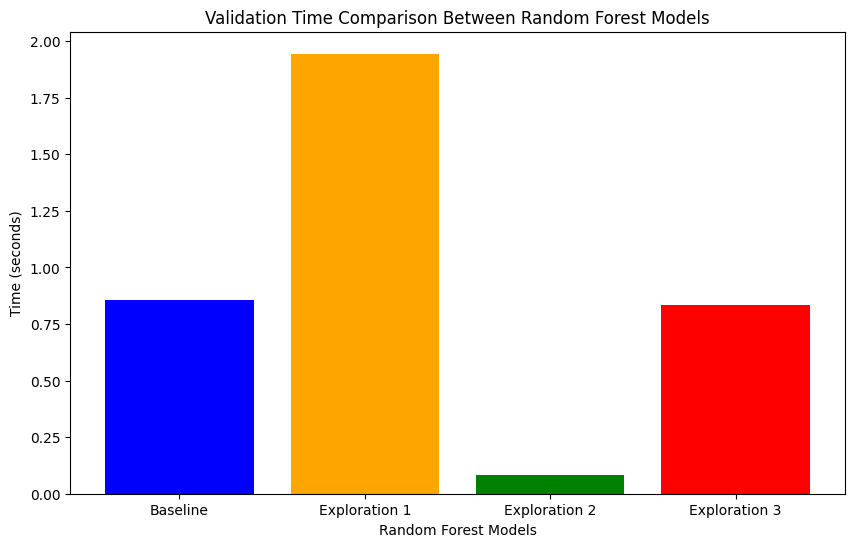

In [82]:
#graph untuk membandingkan lama waktu membuat model
elapsed_time_values = np.array([elapsed_time_baseline, elapsed_time_model1, elapsed_time_model2, elapsed_time_model3])
print(elapsed_time_values)
print(elapsed_time_values[1] - elapsed_time_values[3])

plt.figure(figsize=(10, 6))
plt.bar(models, elapsed_time_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Random Forest Models')
plt.ylabel('Time (seconds)')
plt.title('Time Comparison Between Random Forest Models')
plt.show()

#graph untuk membadningkan lama waktu memvalidasi model
elapsed_time_cv_values = np.array([elapsed_time_cv_baseline, elapsed_time_cv_model1, elapsed_time_cv_model2, elapsed_time_cv_model3])

plt.figure(figsize=(10, 6))
plt.bar(models, elapsed_time_cv_values, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Random Forest Models')
plt.ylabel('Time (seconds)')
plt.title('Validation Time Comparison Between Random Forest Models')
plt.show()

Dapat dilihat bahwa model-model yang kami buat mendapatkan nilai akurasi dan mean cross validation yang sangat baik, semuanya mendapatkan nilai akurasi diatas 97%.

Model baseline dengan jumlah tree sebanyak 100 dan kedalaman treenya sebanyak 15 mendapatkan nilai akurasi dan waktu runtime yang menengahi model lainnya, kecuali untuk nilai validasi (nilai validasi baseline paling bagus). Model Eksplorasi 1 dengan jumlah tree sebanyak 200 (2x baseline) dan kedalaman tree yang sama dengan baseline mendapatkan nilai akurasi yang paling baik, namun karena jumlah treenya, mendapatkan waktu runtime yang paling lama. Model Eksplorasi 2 dengan jumlah tree hanya sebanyak 5 (1/20x baseline) dan kedalaman tree yang sama dengan baseline mendapatkan nilai akurasi paling buruk, namun karena jumlah treenya, mendapatkan waktu runtime yang paling cepat. Model Eksplorasi 3 memiliki jumlah tree yang sama dengan Model baseline, namun karena kedalaman treenya hanya 5 menjadi sedikit terhambat dalam nilai akurasi dan validasinya.

Namun perlu dicatat bahwa perbedaan nilai akurasi dari model yang paling akurat dengan model paling tidak akurat hanyalah 1,4% saja, sedangkan perbedaan runtime diantara kedua model tersebut hanya 0.172 detik.

#Kesimpulan

Dari perbandingan keempat model Random Forest, empat-empatnya menggunakan metode ensemble Bagging dengan variasi jumlah pohon, dan kedalaman pohon. Model-model tersebut digunakan untuk membandingkan akurasi dan performa relatif terhadap baseline model.

Semua model mendapatkan nilai akurasi yang sangat baik, semuanya mendapatkan nilai akurasi diatas 97,3%, nilai validasi diatas 96,7%. Perbedaan Waktu antar model sangat kecil, oleh karena itu dapat diabaikan. Sehingga, dapat disimpulkan lebih baik menggunakan model dengan akurasi dan validasi yang paling tinggi yaitu Model Baseline dengan akurasi 98,58 % dan validasi 98,57%.